<a href="https://colab.research.google.com/github/davro76/AVANSETools/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/MLEssentials2/main/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df.shape

(7043, 21)

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [14]:
df.churn = (df.churn== 'yes').astype(int)

In [15]:
df['churn'].head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: churn, dtype: int64

In [16]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [17]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1,stratify=df['churn'])

In [18]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11,stratify=df_train_full['churn'])

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [20]:
del df_train['churn']
del df_val['churn']

# Exploratory Data Analysis

In [21]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [22]:
df_train_full.churn.value_counts()

0    4139
1    1495
Name: churn, dtype: int64

In [23]:
1495 / (4139 + 1495)

0.2653532126375577

In [24]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.265

In [25]:
df_train_full.churn.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: churn, dtype: float64

In [26]:
df_train_full.head(1)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2246,7181-bqybv,female,0,yes,yes,1,yes,yes,fiber_optic,yes,...,yes,no,yes,yes,month-to-month,yes,electronic_check,102.45,102.45,1


In [27]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [28]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [29]:
df_train_full[numerical].describe()

,tenure,monthlycharges,totalcharges
count,5634.000000,5634.000000,5634.000000
mean,32.325346,64.847515,2275.774033
std,24.577447,30.034961,2264.848225
min,0.000000,18.400000,0.000000
25%,9.000000,35.900000,397.387500
50%,29.000000,70.300000,1390.225000
75%,55.000000,89.850000,3767.100000
max,72.000000,118.750000,8684.800000


In [30]:
df_train_full.corr()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.021800,0.223806,0.108089,0.147949
tenure,0.021800,1.000000,0.243496,0.826569,-0.354078
monthlycharges,0.223806,0.243496,1.000000,0.647520,0.198016
totalcharges,0.108089,0.826569,0.647520,1.000000,-0.197785
churn,0.147949,-0.354078,0.198016,-0.197785,1.000000


# Feature Importance

In [31]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.271
gender == male:   0.26


In [32]:
female_mean / global_mean

1.022165247470154

In [33]:
male_mean / global_mean

0.9780695538801655

In [34]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.195
partner == no : 0.331


In [35]:
print(partner_yes / global_mean)
partner_no / global_mean

0.7359714433670652


1.2462756931337735

In [36]:
from IPython.display import display
global_mean = df_train_full.churn.mean()
global_mean

0.2653532126375577

In [37]:
for col in categorical:
  df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
  df_group['diff'] = df_group['mean'] - global_mean
  df_group['risk'] = df_group['mean'] / global_mean
  display(df_group)

,mean,diff,risk
gender,,,
female,0.271235,0.005882,1.022165
male,0.259534,-0.005819,0.978070


,mean,diff,risk
seniorcitizen,,,
0,0.236909,-0.028444,0.892805
1,0.415367,0.150014,1.565338


,mean,diff,risk
partner,,,
no,0.330703,0.065350,1.246276
yes,0.195292,-0.070061,0.735971


,mean,diff,risk
dependents,,,
no,0.310920,0.045567,1.171722
yes,0.157926,-0.107427,0.595154


,mean,diff,risk
phoneservice,,,
no,0.241135,-0.024218,0.908731
yes,0.268047,0.002694,1.010153


,mean,diff,risk
multiplelines,,,
no,0.253610,-0.011743,0.955744
no_phone_service,0.241135,-0.024218,0.908731
yes,0.284508,0.019155,1.072187


,mean,diff,risk
internetservice,,,
dsl,0.186571,-0.078782,0.703104
fiber_optic,0.421308,0.155954,1.587723
no,0.072199,-0.193154,0.272087


,mean,diff,risk
onlinesecurity,,,
no,0.416844,0.151491,1.570904
no_internet_service,0.072199,-0.193154,0.272087
yes,0.145511,-0.119842,0.548367


,mean,diff,risk
onlinebackup,,,
no,0.405329,0.139976,1.527508
no_internet_service,0.072199,-0.193154,0.272087
yes,0.206967,-0.058386,0.779969


,mean,diff,risk
deviceprotection,,,
no,0.387994,0.122640,1.462178
no_internet_service,0.072199,-0.193154,0.272087
yes,0.228557,-0.036796,0.861330


,mean,diff,risk
techsupport,,,
no,0.412864,0.147511,1.555903
no_internet_service,0.072199,-0.193154,0.272087
yes,0.157351,-0.108002,0.592988


,mean,diff,risk
streamingtv,,,
no,0.333333,0.067980,1.256187
no_internet_service,0.072199,-0.193154,0.272087
yes,0.301930,0.036577,1.137842


,mean,diff,risk
streamingmovies,,,
no,0.332283,0.066930,1.252228
no_internet_service,0.072199,-0.193154,0.272087
yes,0.303442,0.038089,1.143540


,mean,diff,risk
contract,,,
month-to-month,0.427147,0.161794,1.60973
one_year,0.113322,-0.152031,0.42706
two_year,0.026297,-0.239057,0.09910


,mean,diff,risk
paperlessbilling,,,
no,0.164431,-0.100922,0.619668
yes,0.335540,0.070187,1.264504


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.163415,-0.101939,0.615838
credit_card_(automatic),0.148088,-0.117265,0.558078
electronic_check,0.461168,0.195814,1.737939
mailed_check,0.191896,-0.073457,0.723172


In [38]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.099897
onlinesecurity,0.064945
techsupport,0.061113
internetservice,0.057089
onlinebackup,0.049642


,MI
partner,0.011891
seniorcitizen,0.010170
multiplelines,0.000715
phoneservice,0.000170
gender,0.000088


In [43]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.354078
monthlycharges,0.198016
totalcharges,-0.197785


# Feature Engineering

In [45]:
from sklearn.feature_extraction import DictVectorizer

In [46]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [47]:
type(train_dict)

list

In [48]:
train_dict[5]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 1,
 'monthlycharges': 19.75,
 'totalcharges': 19.75}

In [49]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [50]:
X_train = dv.transform(train_dict)

In [51]:
df_train_full.shape

(5634, 21)

In [52]:
X_train.shape

(3774, 45)

In [53]:
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [54]:
sum(df_train_full[categorical].nunique())

43

# Finally... build the model

In [42]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [56]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [57]:
X_val.shape

(1860, 45)

In [58]:
model.predict_proba(X_val)

array([[0.30518846, 0.69481154],
       [0.99168849, 0.00831151],
       [0.77120043, 0.22879957],
       ...,
       [0.79753708, 0.20246292],
       [0.87542085, 0.12457915],
       [0.34351297, 0.65648703]])

In [59]:
y_pred = model.predict_proba(X_val)[:, 1]

In [60]:
y_pred

array([0.69481154, 0.00831151, 0.22879957, ..., 0.20246292, 0.12457915,
       0.65648703])

In [61]:
churn = y_pred > 0.5

In [62]:
(y_val == churn).mean()

0.803763440860215

# Model Interpretation

In [63]:
model.intercept_[0]

-0.1541839938589879

In [64]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.548,
 'contract=one_year': -0.221,
 'contract=two_year': -0.481,
 'dependents=no': -0.02,
 'dependents=yes': -0.134,
 'deviceprotection=no': -0.084,
 'deviceprotection=no_internet_service': -0.12,
 'deviceprotection=yes': 0.049,
 'gender=female': -0.061,
 'gender=male': -0.093,
 'internetservice=dsl': -0.43,
 'internetservice=fiber_optic': 0.396,
 'internetservice=no': -0.12,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.233,
 'multiplelines=no_phone_service': 0.133,
 'multiplelines=yes': -0.054,
 'onlinebackup=no': 0.102,
 'onlinebackup=no_internet_service': -0.12,
 'onlinebackup=yes': -0.136,
 'onlinesecurity=no': 0.279,
 'onlinesecurity=no_internet_service': -0.12,
 'onlinesecurity=yes': -0.314,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.059,
 'partner=no': -0.064,
 'partner=yes': -0.091,
 'paymentmethod=bank_transfer_(automatic)': -0.037,
 'paymentmethod=credit_card_(automatic)': -0.268,
 'paymentmethod=electronic_check': 0.285,
 'p

# Using the Model

In [3]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 1,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 1279.85,
    'totalcharges': 3320.75,
}

In [65]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.9849073268084686

# Evaluation Metrics


In [66]:
y_pred = model.predict_proba(X_val)[:, 1] # A
churn = y_pred >= 0.5 # B
(churn == y_val).mean() # C

0.803763440860215

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
thresholds = np.linspace(0, 1, 11)
 
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.266
0.10 0.617
0.20 0.719
0.30 0.773
0.40 0.789
0.50 0.804
0.60 0.794
0.70 0.772
0.80 0.741
0.90 0.734
1.00 0.734


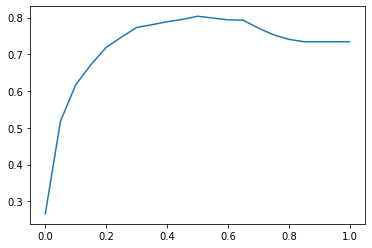

In [69]:
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
plt.plot(thresholds, accuracies)

In [70]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
accuracy_score(baseline, y_val)

0.7344086021505376

Confusion Table

In [71]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [72]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[1241,  125],
       [ 240,  254]])

In [73]:
confusion_table = np.array(
     # predict neg    posprecision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[1241,  125],
       [ 240,  254]])

Evaluate a model with Precision and Recall

In [74]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6701846965699209, 0.5141700404858299)

ROC and A

In [75]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [76]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,494,1366,0,0
10,0.1,471,689,23,677
20,0.2,422,451,72,915
30,0.3,367,295,127,1071
40,0.4,312,211,182,1155
50,0.5,254,125,240,1241
60,0.6,187,76,307,1290
70,0.7,99,30,395,1336
80,0.8,14,2,480,1364
90,0.9,0,0,494,1366


In [77]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [78]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,494,1366,0,0,1.000000,1.000000
10,0.1,471,689,23,677,0.953441,0.504392
20,0.2,422,451,72,915,0.854251,0.330161
30,0.3,367,295,127,1071,0.742915,0.215959
40,0.4,312,211,182,1155,0.631579,0.154466
50,0.5,254,125,240,1241,0.514170,0.091508
60,0.6,187,76,307,1290,0.378543,0.055637
70,0.7,99,30,395,1336,0.200405,0.021962
80,0.8,14,2,480,1364,0.028340,0.001464
90,0.9,0,0,494,1366,0.000000,0.000000


We want TP high and FP low

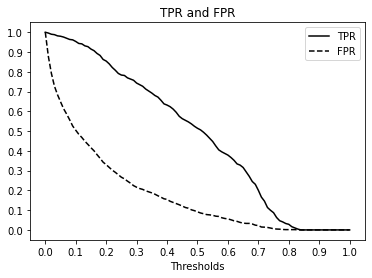

In [82]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

In [83]:

def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [94]:
import matplotlib.pyplot as plt

In [95]:
# plotting w random data 
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,494,1366,0,0,1.000000,1.000000
10,0.1,441,1235,53,131,0.892713,0.904100
20,0.2,393,1100,101,266,0.795547,0.805271
30,0.3,339,972,155,394,0.686235,0.711567
40,0.4,294,843,200,523,0.595142,0.617130
50,0.5,240,722,254,644,0.485830,0.528551
60,0.6,189,583,305,783,0.382591,0.426794
70,0.7,145,429,349,937,0.293522,0.314056
80,0.8,102,298,392,1068,0.206478,0.218155
90,0.9,62,142,432,1224,0.125506,0.103953


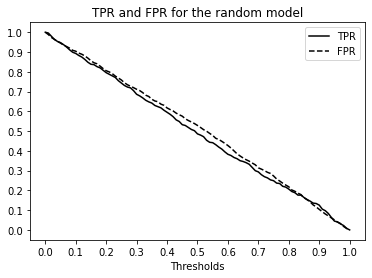

In [96]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

In [85]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,494,1366,0,0,1.000000,1.000000
10,0.1,494,1180,0,186,1.000000,0.863836
20,0.2,494,994,0,372,1.000000,0.727672
30,0.3,494,808,0,558,1.000000,0.591508
40,0.4,494,622,0,744,1.000000,0.455344
50,0.5,494,436,0,930,1.000000,0.319180
60,0.6,494,250,0,1116,1.000000,0.183016
70,0.7,494,64,0,1302,1.000000,0.046852
80,0.8,372,0,122,1366,0.753036,0.000000
90,0.9,186,0,308,1366,0.376518,0.000000


In [86]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,494,1366,0,0,1.000000,1.000000
10,0.1,494,1180,0,186,1.000000,0.863836
20,0.2,494,994,0,372,1.000000,0.727672
30,0.3,494,808,0,558,1.000000,0.591508
40,0.4,494,622,0,744,1.000000,0.455344
50,0.5,494,436,0,930,1.000000,0.319180
60,0.6,494,250,0,1116,1.000000,0.183016
70,0.7,494,64,0,1302,1.000000,0.046852
80,0.8,372,0,122,1366,0.753036,0.000000
90,0.9,186,0,308,1366,0.376518,0.000000


In [88]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,494,1366,0,0,1.000000,1.000000
10,0.1,494,1180,0,186,1.000000,0.863836
20,0.2,494,994,0,372,1.000000,0.727672
30,0.3,494,808,0,558,1.000000,0.591508
40,0.4,494,622,0,744,1.000000,0.455344
50,0.5,494,436,0,930,1.000000,0.319180
60,0.6,494,250,0,1116,1.000000,0.183016
70,0.7,494,64,0,1302,1.000000,0.046852
80,0.8,372,0,122,1366,0.753036,0.000000
90,0.9,186,0,308,1366,0.376518,0.000000


In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [90]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

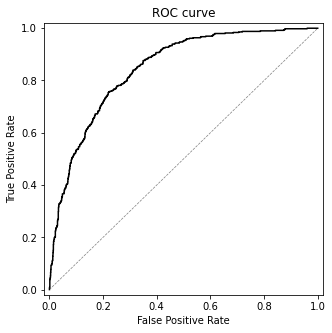

In [91]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
roc_auc_score(y_val, y_pred)

0.8453454632752622